In [122]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fm = mp.font_manager.FontManager()
#한글 지원하는 폰트명으로 재할당
plt.rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='Malgun Gothic')

In [60]:
df_raw2 = pd.read_csv('../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블_2019.csv',encoding='UTF-8')
df1=pd.read_csv('../raw/공원 데이터 정리.csv', sep=',', encoding='UTF-8')
df3=pd.read_csv('../raw/도시림 데이터 정리.csv', sep=',', encoding='UTF-8')

In [61]:
df_raw2.rename(columns={'지역':'자치구'}, inplace=True)
df_raw2

,자치구,연령별,성별,주관적 건강수준,걷기 실천,격렬한 신체활동 실천,긍정적 태도율(자연환경),주관적 스트레스 수준,우울감 경험률,중등도 신체활동 실천,체중조절 경험 여부,행복감 지수
0,서울시,계,계,39.3,59.6,16.2,75.7,24.5,6.3,10.4,66.5,7.0
1,서울시,계,남,44.4,62.3,20.4,77.4,22.6,4.6,12.3,60.0,6.9
2,서울시,계,여,35.3,57.5,13.0,74.4,26.1,7.7,8.9,71.5,6.9
3,서울시,19~44,계,52.2,62.6,19.5,71.5,31.2,6.4,8.8,72.7,7.0
4,서울시,19~44,남,56.6,65.8,25.4,74.0,28.7,4.8,11.5,67.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
385,강남구,65~74,남,28.2,59.0,17.9,84.6,7.7,0.0,17.9,46.2,6.6
386,강남구,65~74,여,31.0,53.4,8.6,74.1,15.5,5.2,19.0,69.0,6.5
387,강남구,75 이상,계,31.7,40.0,8.3,83.3,16.7,8.3,10.0,45.0,6.9
388,강남구,75 이상,남,54.5,45.5,9.1,68.2,18.2,4.5,22.7,40.9,7.4


In [104]:
a = df_raw2.iloc[:,[0,4,10]]


In [158]:
b = df_raw2.iloc[:,[1,4,10]]  #연령별 걷기/체중 
b.head()

,연령별,걷기 실천,체중조절 경험 여부
0,계,59.6,66.5
1,계,62.3,60.0
2,계,57.5,71.5
3,19~44,62.6,72.7
4,19~44,65.8,67.0


In [64]:
df1.iloc[:,[0,1,3,5]]   #공원면적/1인당 공원면적

,자치구,공원 수,공원면적,1인당 공원 면적
0,서울시,"2,868","168,896,780",16.9
1,종로구,106,"11,556,112",71.4
2,중구,73,"3,155,139",23.1
3,용산구,110,"1,779,562",7.3
4,성동구,86,"3,100,047",10.0
5,광진구,60,"3,363,481",9.2
6,동대문구,95,"1,275,134",3.5
7,중랑구,101,"5,205,284",12.9
8,성북구,133,"8,329,401",18.3
9,강북구,82,"14,342,272",45.1


In [65]:
df1['공원면적'] = df1['공원면적'].str.replace(',', '').astype('float')
df1['공원 수'] = df1['공원 수'].str.replace(',', '').astype('float')

In [66]:
df1.dtypes

자치구           object
공원 수         float64
행정구역면적        object
공원면적         float64
공원율          float64
1인당 공원 면적    float64
dtype: object

In [105]:
df_h = pd.merge(df1,a, on='자치구')
df_h.drop(index=[0], axis=0, inplace=True)
df_h

,자치구,공원 수,행정구역면적,공원면적,공원율,1인당 공원 면적,걷기 실천,체중조절 경험 여부
1,서울시,2868.0,"605,237,002",168896780.0,27.91,16.9,62.3,60.0
2,서울시,2868.0,"605,237,002",168896780.0,27.91,16.9,57.5,71.5
3,서울시,2868.0,"605,237,002",168896780.0,27.91,16.9,62.6,72.7
4,서울시,2868.0,"605,237,002",168896780.0,27.91,16.9,65.8,67.0
5,서울시,2868.0,"605,237,002",168896780.0,27.91,16.9,59.8,77.7
...,...,...,...,...,...,...,...,...
385,강동구,124.0,"24,590,256",3369773.0,13.70,7.7,56.1,59.6
386,강동구,124.0,"24,590,256",3369773.0,13.70,7.7,52.8,70.8
387,강동구,124.0,"24,590,256",3369773.0,13.70,7.7,34.3,35.7
388,강동구,124.0,"24,590,256",3369773.0,13.70,7.7,48.6,34.3


In [107]:
df_merge1=pd.merge(df3,a, on='자치구')
df_merge1.drop(index=[0], axis=0, inplace=True)  # 도시림과 신체활동 합치기
df_merge1

,자치구,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적,걷기 실천,체중조절 경험 여부
1,서울시,1.802875e+08,6.684677e+07,18.530737,6.870802,62.3,60.0
2,서울시,1.802875e+08,6.684677e+07,18.530737,6.870802,57.5,71.5
3,서울시,1.802875e+08,6.684677e+07,18.530737,6.870802,62.6,72.7
4,서울시,1.802875e+08,6.684677e+07,18.530737,6.870802,65.8,67.0
5,서울시,1.802875e+08,6.684677e+07,18.530737,6.870802,59.8,77.7
...,...,...,...,...,...,...,...
385,강동구,6.942628e+06,3.959394e+06,15.921012,9.079784,56.1,59.6
386,강동구,6.942628e+06,3.959394e+06,15.921012,9.079784,52.8,70.8
387,강동구,6.942628e+06,3.959394e+06,15.921012,9.079784,34.3,35.7
388,강동구,6.942628e+06,3.959394e+06,15.921012,9.079784,48.6,34.3


In [108]:
corr=df_merge.corr()
corr   # 공원과 걷기/체중조절 상관관계

,공원 수,공원면적,공원율,1인당 공원 면적,걷기 실천,체중조절 경험 여부
공원 수,1.000000,0.990936,0.014626,-0.011260,0.002892,0.002227
공원면적,0.990936,1.000000,0.141111,0.097847,-0.023845,-0.004247
공원율,0.014626,0.141111,1.000000,0.834898,-0.206610,-0.104015
1인당 공원 면적,-0.011260,0.097847,0.834898,1.000000,-0.324334,-0.081747
걷기 실천,0.002892,-0.023845,-0.206610,-0.324334,1.000000,0.361337
체중조절 경험 여부,0.002227,-0.004247,-0.104015,-0.081747,0.361337,1.000000


<AxesSubplot:>

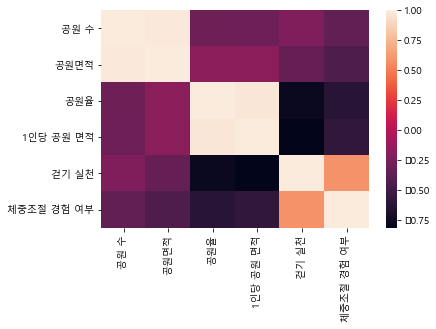

In [111]:
sns.heatmap(corr.corr())

In [109]:
corr1=df_merge1.corr()
corr1   # 도시림과 걷기/체중조절 상관관계

,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적,걷기 실천,체중조절 경험 여부
총 도시림 면적,1.000000,0.975345,0.074125,0.059139,-0.031079,-0.004792
생활권 도시림 면적,0.975345,1.000000,0.026504,0.219173,-0.004431,0.041525
1인당 총 도시림 면적,0.074125,0.026504,1.000000,0.481244,-0.340047,-0.106849
1인당 생활권 도시림 면적,0.059139,0.219173,0.481244,1.000000,-0.113442,0.128575
걷기 실천,-0.031079,-0.004431,-0.340047,-0.113442,1.000000,0.361337
체중조절 경험 여부,-0.004792,0.041525,-0.106849,0.128575,0.361337,1.000000


C:\Users\hayoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hayoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

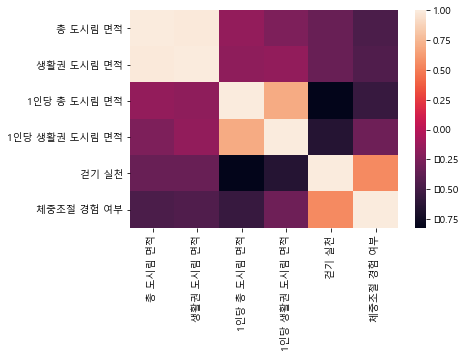

In [110]:
sns.heatmap(corr1.corr())

In [95]:
b.reindex('')

,자치구,연령별,성별,걷기 실천,주관적 스트레스 수준


In [112]:
merge_14 = b[b['연령별'] == '19~44']
merge_14= merge_14[b['성별'] == '계']
merge_14 = pd.merge(merge_14,df3, on='자치구')   # 19세~44세
merge_14

<ipython-input-112-3b91a293b677>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_14= merge_14[b['성별'] == '계']


,자치구,연령별,성별,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
0,서울시,19~44,계,62.6,72.7,1.802875e+08,6.684677e+07,18.530737,6.870802
1,영등포구,19~44,계,69.6,76.5,2.558024e+06,2.525751e+06,6.957240,6.869465
2,양천구,19~44,계,66.3,67.8,3.659173e+06,1.860690e+06,7.986583,4.061179
3,마포구,19~44,계,62.8,76.7,3.977250e+06,3.956310e+06,10.633363,10.577379
4,동작구,19~44,계,69.1,74.3,3.862343e+06,2.338377e+06,9.754303,5.905544
5,금천구,19~44,계,64.3,68.4,3.126930e+06,4.139500e+05,13.431253,1.778059
6,구로구,19~44,계,63.9,73.8,3.432140e+06,1.325089e+06,8.439744,3.258437
7,관악구,19~44,계,64.1,72.1,1.583360e+07,5.399620e+05,31.661242,1.079721
8,강서구,19~44,계,59.4,71.3,8.294106e+06,4.322172e+06,14.015144,7.303483
9,중랑구,19~44,계,64.6,68.8,6.274698e+06,1.477730e+06,15.804687,3.722101


In [113]:
corr1_=merge_14.corr()
corr1_ 

,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
걷기 실천,1.000000,0.216394,-0.024242,-0.016108,-0.444285,-0.245694
체중조절 경험 여부,0.216394,1.000000,-0.019411,0.078868,-0.276581,0.212101
총 도시림 면적,-0.024242,-0.019411,1.000000,0.976859,0.070354,0.057043
생활권 도시림 면적,-0.016108,0.078868,0.976859,1.000000,0.024318,0.212221
1인당 총 도시림 면적,-0.444285,-0.276581,0.070354,0.024318,1.000000,0.481241
1인당 생활권 도시림 면적,-0.245694,0.212101,0.057043,0.212221,0.481241,1.000000


In [114]:
merge_45 = b[b['연령별'] == '45~64']
merge_45= merge_45[b['성별'] == '계']
merge_45 = pd.merge(merge_45,df3, on='자치구')   # 45세~64세
merge_45

<ipython-input-114-889822497106>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_45= merge_45[b['성별'] == '계']


,자치구,연령별,성별,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
0,서울시,45~64,계,59.0,70.6,1.802875e+08,6.684677e+07,18.530737,6.870802
1,영등포구,45~64,계,75.3,67.5,2.558024e+06,2.525751e+06,6.957240,6.869465
2,양천구,45~64,계,59.1,75.6,3.659173e+06,1.860690e+06,7.986583,4.061179
3,마포구,45~64,계,53.5,76.8,3.977250e+06,3.956310e+06,10.633363,10.577379
4,동작구,45~64,계,65.3,72.0,3.862343e+06,2.338377e+06,9.754303,5.905544
5,금천구,45~64,계,62.6,69.9,3.126930e+06,4.139500e+05,13.431253,1.778059
6,구로구,45~64,계,58.5,68.1,3.432140e+06,1.325089e+06,8.439744,3.258437
7,관악구,45~64,계,62.7,68.8,1.583360e+07,5.399620e+05,31.661242,1.079721
8,강서구,45~64,계,57.5,70.7,8.294106e+06,4.322172e+06,14.015144,7.303483
9,중랑구,45~64,계,57.9,66.0,6.274698e+06,1.477730e+06,15.804687,3.722101


In [115]:
corr2_=merge_45.corr()
corr2_ 

,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
걷기 실천,1.000000,0.047755,-0.042075,-0.044120,-0.411183,-0.261481
체중조절 경험 여부,0.047755,1.000000,0.010690,0.156477,-0.177498,0.498669
총 도시림 면적,-0.042075,0.010690,1.000000,0.976859,0.070354,0.057043
생활권 도시림 면적,-0.044120,0.156477,0.976859,1.000000,0.024318,0.212221
1인당 총 도시림 면적,-0.411183,-0.177498,0.070354,0.024318,1.000000,0.481241
1인당 생활권 도시림 면적,-0.261481,0.498669,0.057043,0.212221,0.481241,1.000000


In [116]:
merge_65 = b[b['연령별'] == '65~74']
merge_65= merge_65[b['성별'] == '계']
merge_65 = pd.merge(merge_65,df3, on='자치구')   

<ipython-input-116-9fd9809718cd>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_65= merge_65[b['성별'] == '계']


In [117]:
corr3_=merge_65.corr()
corr3_ 

,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
걷기 실천,1.000000,0.246628,-0.033342,0.035179,-0.351700,0.032532
체중조절 경험 여부,0.246628,1.000000,-0.006561,0.098461,-0.303971,0.286995
총 도시림 면적,-0.033342,-0.006561,1.000000,0.976859,0.070354,0.057043
생활권 도시림 면적,0.035179,0.098461,0.976859,1.000000,0.024318,0.212221
1인당 총 도시림 면적,-0.351700,-0.303971,0.070354,0.024318,1.000000,0.481241
1인당 생활권 도시림 면적,0.032532,0.286995,0.057043,0.212221,0.481241,1.000000


In [129]:
merge_75 = b[b['연령별'] == '75 이상']
merge_75= merge_75[b['성별'] == '계']
merge_75 = pd.merge(merge_75,df3, on='자치구')   

<ipython-input-129-66e84268ba8b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merge_75= merge_75[b['성별'] == '계']


In [130]:
corr4_=merge_75.corr()
corr4_ 

,걷기 실천,체중조절 경험 여부,총 도시림 면적,생활권 도시림 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
걷기 실천,1.000000,0.325086,-0.048321,0.002748,-0.514473,-0.128309
체중조절 경험 여부,0.325086,1.000000,0.012786,0.102938,-0.290292,0.254398
총 도시림 면적,-0.048321,0.012786,1.000000,0.976859,0.070354,0.057043
생활권 도시림 면적,0.002748,0.102938,0.976859,1.000000,0.024318,0.212221
1인당 총 도시림 면적,-0.514473,-0.290292,0.070354,0.024318,1.000000,0.481241
1인당 생활권 도시림 면적,-0.128309,0.254398,0.057043,0.212221,0.481241,1.000000


In [132]:
b

,자치구,연령별,성별,걷기 실천,체중조절 경험 여부
0,서울시,계,계,59.6,66.5
1,서울시,계,남,62.3,60.0
2,서울시,계,여,57.5,71.5
3,서울시,19~44,계,62.6,72.7
4,서울시,19~44,남,65.8,67.0
...,...,...,...,...,...
385,강남구,65~74,남,59.0,46.2
386,강남구,65~74,여,53.4,69.0
387,강남구,75 이상,계,40.0,45.0
388,강남구,75 이상,남,45.5,40.9


In [178]:
a_=df_raw2.iloc[:,[1,4]]

In [ ]:
merge_14 = b[b['연령별'] == '계']
merge_14= merge_14[b['성별'] == '남']